In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

data = np.load("neg_2.npz")

In [2]:
print(data)

In [3]:
print(data.keys())

['b', 'a']


In [10]:
faces = data['a']
landmarks = data['b']
desiredFaceWidth = 112
desiredFaceHeight = 96
desiredLeftEye = [0.35, 0.35]
desiredRightEyeX = 1.0 - desiredLeftEye[0]

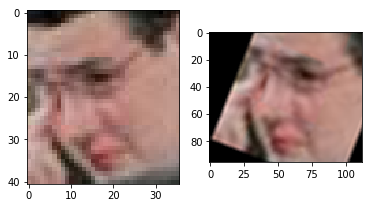

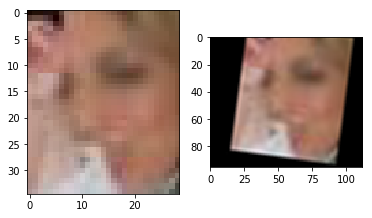

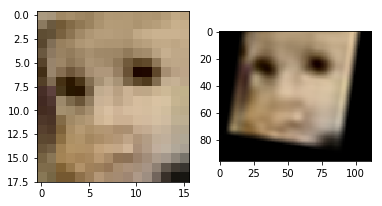

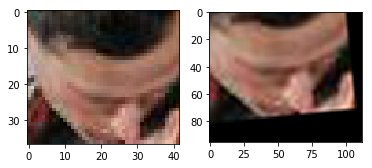

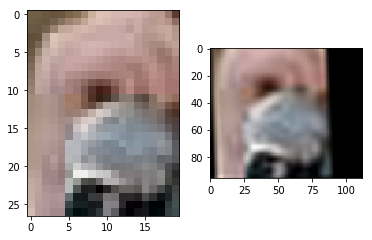

In [11]:
for i in range(len(faces)):
    leftEyeCenter = [landmarks[i][0], landmarks[i][5]]
    rightEyeCenter = [landmarks[i][1], landmarks[i][6]]
    
#     imgplot = plt.imshow(faces[i])
#     for j in range(5):
#         plt.scatter(landmarks[i][j], landmarks[i][j+5], color='red')
#     plt.scatter((leftEyeCenter[0]+rightEyeCenter[0])/2,(leftEyeCenter[1]+rightEyeCenter[1])/2, color = 'red')
#     plt.show()
    
    dY = rightEyeCenter[1] - leftEyeCenter[1]
    dX = rightEyeCenter[0] - leftEyeCenter[0]
    angle = np.degrees(np.arctan2(dY, dX))
    
    eyesCenter = ((leftEyeCenter[0]+rightEyeCenter[0])/2,(leftEyeCenter[1]+rightEyeCenter[1])/2)
    
    dist = np.sqrt((dX ** 2) + (dY ** 2))
    desiredDist = (desiredRightEyeX - desiredLeftEye[0])
    desiredDist *= desiredFaceWidth
    scale = desiredDist / dist
    
    M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
    
    tX = desiredFaceWidth * 0.5
    tY = desiredFaceHeight * desiredLeftEye[1]
    M[0, 2] += (tX - eyesCenter[0])
    M[1, 2] += (tY - eyesCenter[1])
    
    (w, h) = (desiredFaceWidth, desiredFaceHeight)
    output = cv2.warpAffine(faces[i], M, (w, h),flags=cv2.INTER_CUBIC)
    
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(faces[i])
    axarr[1].imshow(output)

In [12]:
print(landmarks[i])
leftEyeCenter = [landmarks[i][0], landmarks[i][5]]
rightEyeCenter = [landmarks[i][1], landmarks[i][6]]
print(rightEyeCenter)
print(leftEyeCenter)

[  8.43552685  16.40041924  13.53094006   8.67639828  14.60583782
  11.57279587  11.92665863  17.02922821  22.40456772  22.80724716]
[16.400419, 11.926659]
[8.4355268, 11.572796]


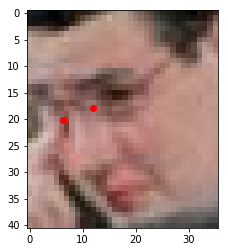

In [83]:
imgplot = plt.imshow(faces[i])
for j in range(1):
    plt.scatter(landmarks[i][j], landmarks[i][j+5], color='red')
plt.scatter((leftEyeCenter[0]+rightEyeCenter[0])/2,(leftEyeCenter[1]+rightEyeCenter[1])/2, color = 'red')
plt.show()

In [84]:
dY = rightEyeCenter[1] - leftEyeCenter[1]
dX = rightEyeCenter[0] - leftEyeCenter[0]
angle = np.degrees(np.arctan2(dY, dX))

In [85]:
print(angle)

-21.8225


In [70]:
eyesCenter = ((leftEyeCenter[0]+rightEyeCenter[0])/2,(leftEyeCenter[1]+rightEyeCenter[1])/2)

In [71]:
desiredFaceWidth = 112
desiredFaceHeight = 96

In [73]:
dist = np.sqrt((dX ** 2) + (dY ** 2))
desiredDist = (desiredRightEyeX - desiredLeftEye[0])
desiredDist *= desiredFaceWidth
scale = desiredDist / dist

In [74]:
# scale = 1
print(scale)

2.75893293782


In [75]:
M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)

In [76]:
print(desiredFaceHeight)

96


In [77]:
tX = desiredFaceWidth * 0.5
tY = desiredFaceHeight * desiredLeftEye[1]
M[0, 2] += (tX - eyesCenter[0])
M[1, 2] += (tY - eyesCenter[1])

In [78]:
(w, h) = (desiredFaceWidth, desiredFaceHeight)
output = cv2.warpAffine(faces[i], M, (w, h),flags=cv2.INTER_CUBIC)

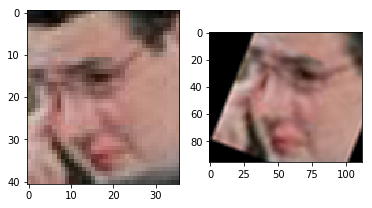

In [79]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(faces[i], )
axarr[1].imshow(output)

In [80]:
print(output.shape)

(96, 112, 3)
